In [41]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

<br></br>
<br></br>
<h1><center><font size="+2">Locating underwater pingers</font></center></h1>
<center><p1><font size="6">with an AUV \& 2 hydrophones</font></p1></center>

<br></br>
<br></br>
<font size="5">
    <p1><center>AUV stands for <b>autonomous underwater vehicle</b>.</center></p1> 
</font>
<br></br>

<center>
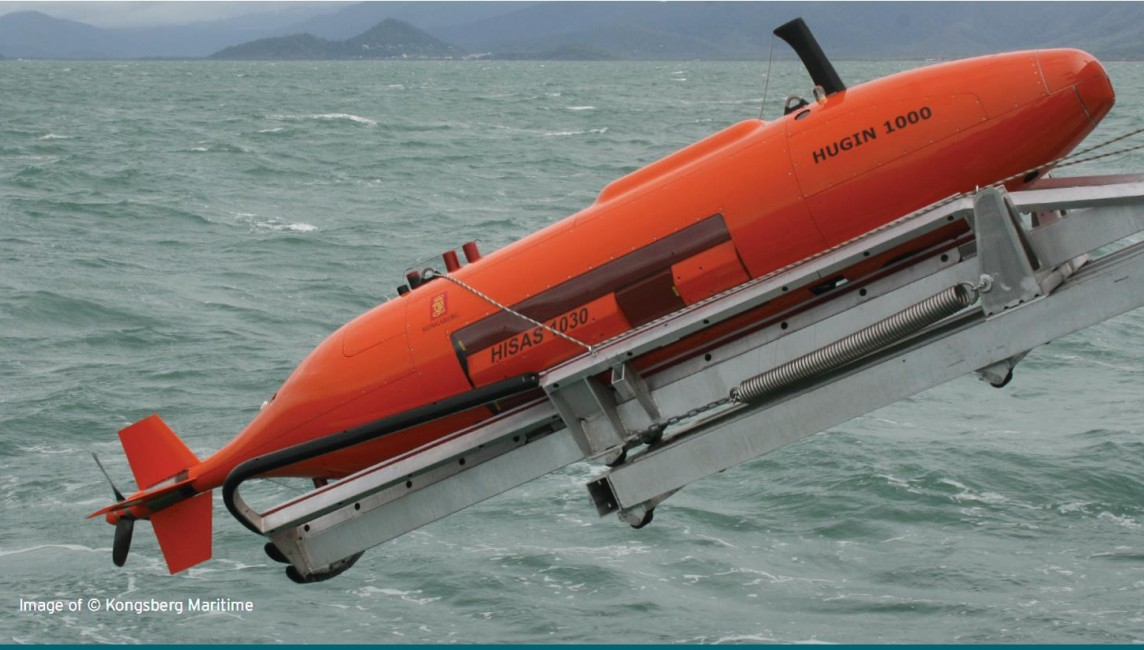
</center>


<center>
    
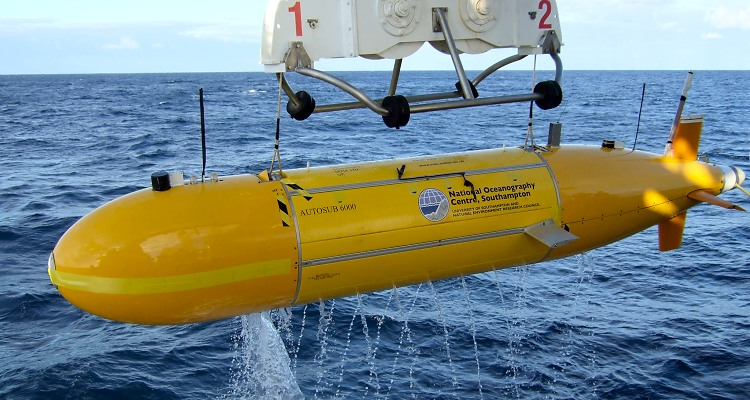
</center>

<center>
    
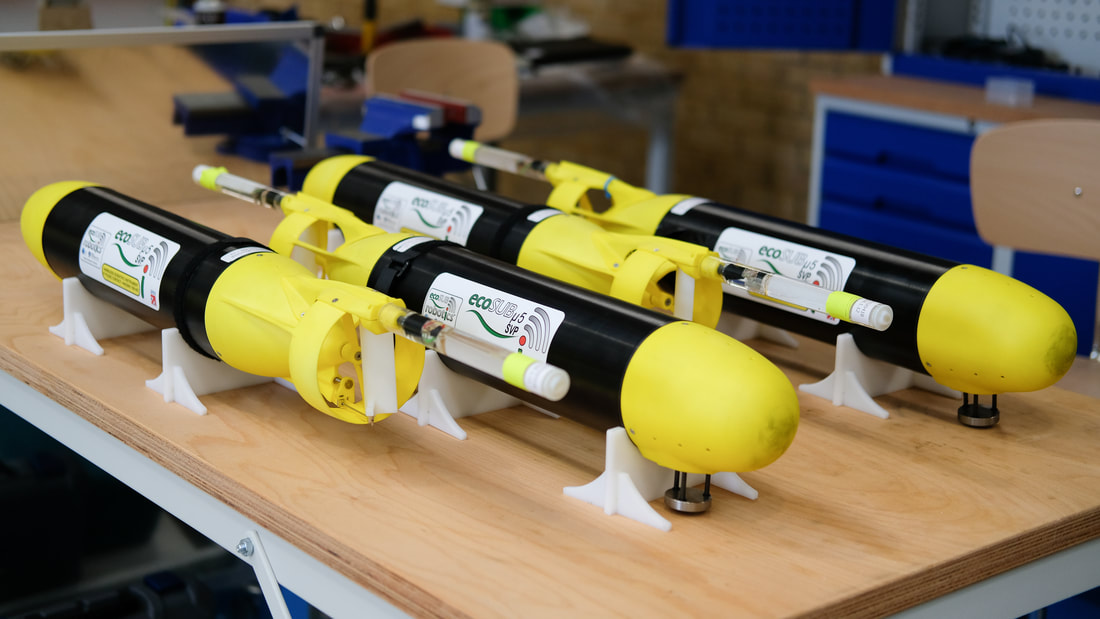
</center>
    

<br></br>
<font size="4">
<center>
    <p1>We might be looking for a underwater pinger that sounds like this:</p1></center>
</font>
<br></br>

In [42]:
import IPython
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")
IPython.display.Audio("C:/Users/emushka/Desktop/LF_ulb.wav")

<br></br>
<center>
<font size="4">
    <p1>Suppose the pinger is stationary at some unknown position on the ocean floor.</p1></center>
</font>

from IPython.display import Image
from IPython.display import display, HTML
Image("C:/Users/emushka/Desktop/pinger.png",width=600,height=400)


<font size="4">
    <p1>We would like to locate it using an AUV carrying only two hydrophones.</p1>
</font>
<br></br>

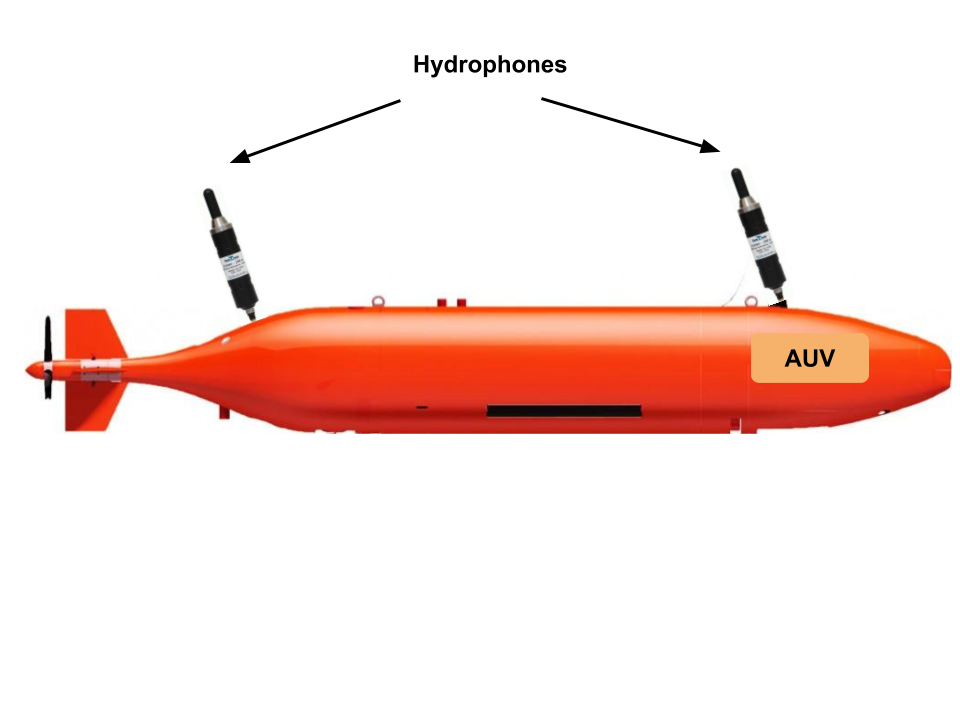

In [44]:
#from IPython.display import Image
#from IPython.display import display, HTML
Image("C:/Users/emushka/Desktop/AUV.png",width=700,height=200)

We use the AUV to create synthetic array....

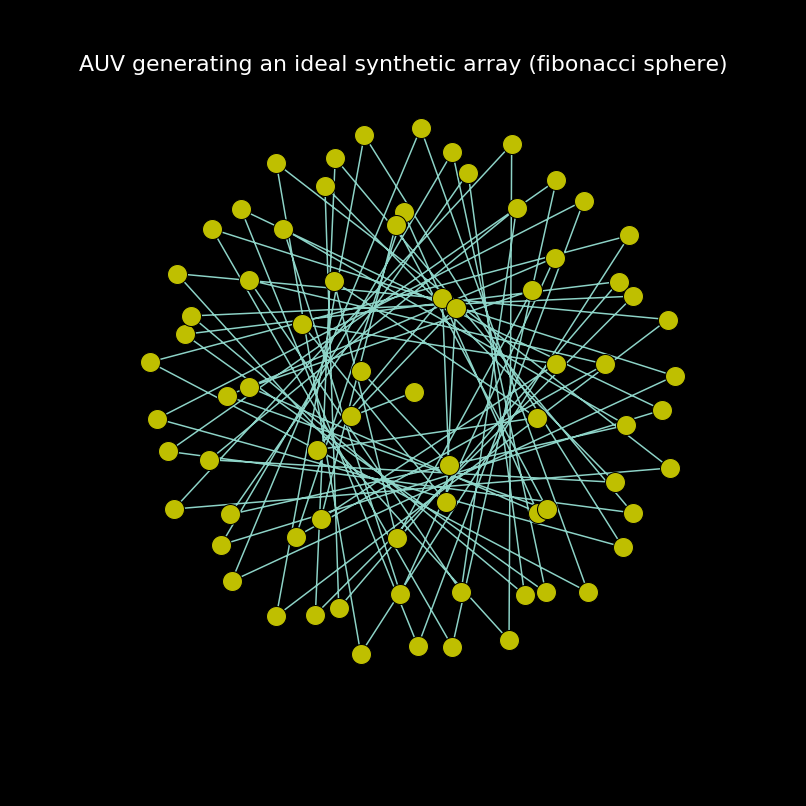

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import matplotlib.path as mpath
from matplotlib import rcParams, rc
from IPython.display import HTML

plt.style.use('dark_background')
fig = plt.figure(figsize=(11,11))
ax = p3.Axes3D(fig)
title = ax.set_title('AUV generating an ideal synthetic array (fibonacci sphere)',fontsize=22)
ax.view_init(elev=90, azim=0)
rcParams['axes.titlepad'] = 0

DATA_temp = np.loadtxt("C:/Users/emushka/Desktop/fibspheredemo.txt")
DATA_temp = np.flip(DATA_temp,axis=0)
zmax = np.max(DATA_temp[:,2])
DATA = np.zeros((1, DATA_temp.shape[1],DATA_temp.shape[0]))
DATA[0,:,:] = DATA_temp.transpose()


Lm = 15
ax.set_xlim(-Lm,Lm)
ax.set_ylim(-Lm,Lm)
ax.set_zlim(-Lm,Lm/2)


def get_hurricane():
    u = np.array([  [-5,0],
                    [-4,-1],
                    [1,-1],
                    [1,-1.5],
                    [2,-1.5],
                    [2,-1],
                    [4,0],
                    [3,0.5],
                    [3,1.75],
                    [3.5,2],
                    [3.5,2],
                    [2,2],
                    [2,1],
                    [-4,1],
                    [-5,0]])

    codes = [1] + [2]*(len(u)-2) + [2] 
    # u = np.append(u, -u[::-1], axis=0)
    # codes += codes
    return mpath.Path(3*u, codes, closed=False)

hurr = get_hurricane()

def init(): 
    # creating an empty plot/frame  
    for line in lines:
        line.set_data([],[])
        line.set_3d_properties([])
    return lines


x,y,z = [],[],[]

X = DATA[0,0,:]
Y = DATA[0,1,:]
Z = DATA[0,2,:]
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
# Comment or uncomment following both lines to test the fake bounding box:
for xb, yb, zb in zip(Xb, Yb, Zb):
   ax.plot([xb], [yb], [zb], 'k')


def animate(num,dataLines,lines):
    for line,data in zip(lines,dataLines):
        line.set_data(data[0:2,:num])
        line.set_3d_properties(data[2,:num])
        line.set_marker("o")
        line.set_markerfacecolor("y")
        line.set_markeredgecolor('k')
        line.set_markersize(20)
    return lines

for ind in range(200):
    
    current = 0.2*ind
    x0 = Lm*np.cos(current)
    y0 = Lm*np.sin(current)
    z0 = current/2
    
    x.append(x0)
    y.append(y0)
    z.append(z0)
    
# data = np.array([[x,y,z]])
lines = [ax.plot(dat[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]
# lines = [ax.plot(DATA[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]

plt.axis("off")
anim = animation.FuncAnimation(fig, animate,fargs=(DATA,lines),
                               init_func=init,interval=500, blit=True,
                               repeat = True) 
# plt.show()

# anim.save('randrot1.gif', dpi=100, fps=1, writer='html')
HTML(anim.to_html5_video())
#rc('animation', html='html5')

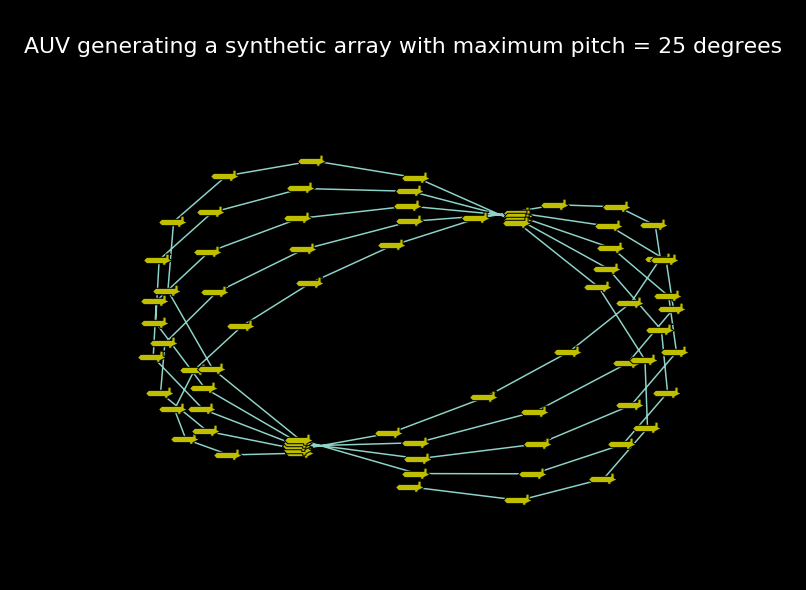

In [46]:

fig = plt.figure(figsize=(11,8))
ax = p3.Axes3D(fig)
title = ax.set_title('AUV generating a synthetic array with maximum pitch = 25 degrees',fontsize=22)
ax.set_axis_on()
ax.view_init(elev=40, azim=20)
rcParams['axes.titlepad'] = 0

DATA_temp = np.loadtxt("C:/Users/emushka/Desktop/slantcircdemo.txt")
DATA_temp = np.flip(DATA_temp,axis=0)
zmax = np.max(DATA_temp[:,2])
DATA = np.zeros((1, DATA_temp.shape[1],DATA_temp.shape[0]))
DATA[0,:,:] = DATA_temp.transpose()


Lm = 40
ax.set_xlim(-Lm,Lm)
ax.set_ylim(-Lm,Lm)
ax.set_zlim(-Lm,Lm/2)

def init(): 
    # creating an empty plot/frame  
    for line in lines:
        line.set_data([],[])
        line.set_3d_properties([])
    return lines


x,y,z = [],[],[]

def animate(num,dataLines,lines):
    for line,data in zip(lines,dataLines):
        line.set_data(data[0:2,:num])
        line.set_3d_properties(data[2,:num])
        line.set_marker(hurr)
        line.set_markerfacecolor("y")
        line.set_markeredgecolor('k')
        line.set_markersize(32)
    return lines

for ind in range(200):
    
    current = 0.2*ind
    x0 = Lm*np.cos(current)
    y0 = Lm*np.sin(current)
    z0 = current/2
    
    x.append(x0)
    y.append(y0)
    z.append(z0)
    
# data = np.array([[x,y,z]])
lines = [ax.plot(dat[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]
# lines = [ax.plot(DATA[0,0:1],dat[1,0:1],dat[2,0:1])[0] for dat in DATA]

plt.axis("off")
anim = animation.FuncAnimation(fig, animate,fargs=(DATA,lines),
                               init_func=init,interval=500, blit=True,
                               repeat = True) 
# plt.show()

# anim.save('randrot1.gif', dpi=100, fps=1, writer='html')
HTML(anim.to_html5_video())
#rc('animation', html='html5')